# Imports

In [1]:
%%capture
%load_ext autoreload
%autoreload all
from helper import *
from __init__ import root_dir, data_path

2023-04-25 03:29:44.581333: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-25 03:29:44.634624: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-25 03:29:44.635468: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 03:29:45.635305: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
%%capture
df_clean = pd.read_csv(data_path + '/' +'clean.csv', parse_dates=['Timestamp'])
datam=load_data(df_clean)
data_m=split(datam)

In [9]:
data_m=data_m[144:-284]
data_m.isna().sum()

Timestamp                  0
Day_Ahead_price           13
ttf_price                  0
coal_price                 0
co2_price                  0
Hour                       0
Weekday                    0
business                  13
DK_1_imports_mean4         0
SE_4_imports_mean4         0
DK_1_exports_mean4         0
SE_4_exports_mean4         0
Actual_Load_mean4          0
Solar_[MW]_mean4           0
DE_LU_AT_imports_mean4     0
DE_LU_AT_exports_mean4     0
Wind Total_mean4           0
dtype: int64

In [23]:
data_m[data_m['Day_Ahead_price'].isna()==True]

,Timestamp,Day_Ahead_price,ttf_price,coal_price,co2_price,Hour,Weekday,business,DK_1_imports_mean4,SE_4_imports_mean4,DK_1_exports_mean4,SE_4_exports_mean4,Actual_Load_mean4,Solar_[MW]_mean4,DE_LU_AT_imports_mean4,DE_LU_AT_exports_mean4,Wind Total_mean4
1706,2018-03-25 02:00:00,NaN,18.445000,96.75,13.23,2,6,NaN,441.25,0.25,0.00,727.25,1419.25,0.00,450.00,74.00,402.00
9338,2019-03-31 02:00:00,NaN,14.215000,92.75,22.82,2,6,NaN,327.75,166.50,0.25,672.25,1234.25,0.00,422.25,113.25,644.75
16826,2020-03-29 02:00:00,NaN,7.220000,66.65,17.11,2,6,NaN,517.25,68.75,0.00,367.50,1237.75,0.00,104.25,275.75,386.50
24314,2021-03-28 02:00:00,NaN,18.700001,93.95,42.09,2,6,NaN,164.75,642.50,111.00,259.75,1351.50,0.00,150.00,510.25,671.25
30873,2022-02-10 09:00:00,NaN,74.352997,239.10,90.78,9,3,NaN,358.00,124.75,0.50,401.75,2063.25,11.75,793.50,1169.50,747.25
31802,2022-03-27 02:00:00,NaN,101.268997,327.15,78.60,2,6,NaN,21.25,1246.25,172.00,0.00,1352.50,0.00,0.00,2957.25,270.50
33849,2022-07-05 09:00:00,NaN,165.072998,397.60,83.19,9,1,NaN,412.25,264.50,0.00,34.50,1672.25,290.00,981.50,1046.25,282.50
39290,2023-03-26 02:00:00,NaN,41.094002,175.35,79.40,2,6,NaN,0.00,913.75,434.75,0.00,1365.50,0.00,0.00,1696.25,489.00
39610,2023-04-11 10:00:00,NaN,43.692001,194.15,79.40,10,1,NaN,1.50,731.25,169.50,0.00,1817.50,232.00,41.25,1145.00,555.75
39717,2023-04-15 21:00:00,NaN,41.148998,194.15,79.40,21,5,NaN,0.00,1094.25,393.50,0.00,1435.00,0.00,0.00,2062.25,578.25


# Data-transformation for mid term

In [10]:
# setting up features and target
cols_std = ['ttf_price', 'coal_price', 'co2_price','DK_1_imports_mean4',
       'SE_4_imports_mean4', 'DK_1_exports_mean4', 'SE_4_exports_mean4',
       'Actual_Load_mean4', 'Solar_[MW]_mean4', 'DE_LU_AT_imports_mean4',
       'DE_LU_AT_exports_mean4', 'Wind Total_mean4'] 
features = cols_std + ['Weekday', 'Hour']
target = 'Day_Ahead_price'

In [11]:
# setting up splits
train_start = pd.to_datetime(['2018-01-09', '2021-01-01', '2021-08-01'], format = '%Y-%m-%d')
k_folds = len(train_start)


df_lagged=data_m.copy()
df_lagged

,Timestamp,Day_Ahead_price,ttf_price,coal_price,co2_price,Hour,Weekday,business,DK_1_imports_mean4,SE_4_imports_mean4,DK_1_exports_mean4,SE_4_exports_mean4,Actual_Load_mean4,Solar_[MW]_mean4,DE_LU_AT_imports_mean4,DE_LU_AT_exports_mean4,Wind Total_mean4
144,2018-01-09 00:00:00,27.17,19.434999,107.00,8.19,0,1,True,383.0,0.00,0.00,808.0,1245.00,0.0,600.00,0.00,429.00
145,2018-01-09 01:00:00,22.10,19.434999,107.00,8.19,1,1,True,589.0,0.00,0.00,1019.0,1203.00,0.0,600.00,0.00,375.00
146,2018-01-09 02:00:00,9.79,19.434999,107.00,8.19,2,1,True,557.0,0.00,0.00,926.0,1178.00,0.0,600.00,0.00,313.00
147,2018-01-09 03:00:00,4.99,19.434999,107.00,8.19,3,1,True,487.0,0.00,0.00,784.0,1180.00,0.0,600.00,0.00,229.00
148,2018-01-09 04:00:00,9.24,19.434999,107.00,8.19,4,1,True,580.0,0.00,0.00,756.0,1247.00,0.0,600.00,0.00,175.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39716,2023-04-15 20:00:00,50.01,41.148998,194.15,79.40,20,5,False,0.0,1087.75,374.50,0.0,1506.50,0.0,1.00,2012.50,583.00
39717,2023-04-15 21:00:00,NaN,41.148998,194.15,79.40,21,5,NaN,0.0,1094.25,393.50,0.0,1435.00,0.0,0.00,2062.25,578.25
39718,2023-04-15 22:00:00,NaN,41.148998,194.15,79.40,22,5,NaN,0.0,1014.75,420.50,0.0,1380.00,0.0,7.00,1689.50,555.25
39719,2023-04-15 23:00:00,NaN,41.148998,194.15,79.40,23,5,NaN,0.0,924.75,405.75,0.0,1323.75,0.0,255.25,1759.50,583.00


# Models

## Split - Method = 0
The approach is to train and test in consecutive/sequential blocks, devoting 85% to training and 15% to test.

In [12]:
split_method = 0
df_lagged

,Timestamp,Day_Ahead_price,ttf_price,coal_price,co2_price,Hour,Weekday,business,DK_1_imports_mean4,SE_4_imports_mean4,DK_1_exports_mean4,SE_4_exports_mean4,Actual_Load_mean4,Solar_[MW]_mean4,DE_LU_AT_imports_mean4,DE_LU_AT_exports_mean4,Wind Total_mean4
144,2018-01-09 00:00:00,27.17,19.434999,107.00,8.19,0,1,True,383.0,0.00,0.00,808.0,1245.00,0.0,600.00,0.00,429.00
145,2018-01-09 01:00:00,22.10,19.434999,107.00,8.19,1,1,True,589.0,0.00,0.00,1019.0,1203.00,0.0,600.00,0.00,375.00
146,2018-01-09 02:00:00,9.79,19.434999,107.00,8.19,2,1,True,557.0,0.00,0.00,926.0,1178.00,0.0,600.00,0.00,313.00
147,2018-01-09 03:00:00,4.99,19.434999,107.00,8.19,3,1,True,487.0,0.00,0.00,784.0,1180.00,0.0,600.00,0.00,229.00
148,2018-01-09 04:00:00,9.24,19.434999,107.00,8.19,4,1,True,580.0,0.00,0.00,756.0,1247.00,0.0,600.00,0.00,175.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39716,2023-04-15 20:00:00,50.01,41.148998,194.15,79.40,20,5,False,0.0,1087.75,374.50,0.0,1506.50,0.0,1.00,2012.50,583.00
39717,2023-04-15 21:00:00,NaN,41.148998,194.15,79.40,21,5,NaN,0.0,1094.25,393.50,0.0,1435.00,0.0,0.00,2062.25,578.25
39718,2023-04-15 22:00:00,NaN,41.148998,194.15,79.40,22,5,NaN,0.0,1014.75,420.50,0.0,1380.00,0.0,7.00,1689.50,555.25
39719,2023-04-15 23:00:00,NaN,41.148998,194.15,79.40,23,5,NaN,0.0,924.75,405.75,0.0,1323.75,0.0,255.25,1759.50,583.00


### Baseline

In [13]:
lr_pred_0, lr_model_0 = run_model('lr', df_lagged, k_folds, split_method,
                                         train_start, features, target, cols_std)

Iteration  0
train 2018-01-09 00:00:00 - 2020-07-21 23:00:00, test 2020-07-22 00:00:00 - 2020-12-31 23:00:00


ValueError: Input y contains NaN.

In [7]:
lr_model_0

[{'copy_X': True,
  'fit_intercept': True,
  'n_jobs': None,
  'normalize': 'deprecated',
  'positive': False},
 {'copy_X': True,
  'fit_intercept': True,
  'n_jobs': None,
  'normalize': 'deprecated',
  'positive': False},
 {'copy_X': True,
  'fit_intercept': True,
  'n_jobs': None,
  'normalize': 'deprecated',
  'positive': False}]

### Moving average

In [8]:
df_ma_0 = run_model('ma', df_lagged, k_folds, split_method,
                                         train_start, features, target, cols_std, pred_window = 24*1)

df_ma_0.dropna(how = 'any', axis = 0, inplace = True)
df_ma_0.drop(df_ma_0[df_ma_0[target] == 0].index, inplace = True)

TypeError: run_model() got an unexpected keyword argument 'pred_window'

In [ ]:
ytrue = np.array(df_ma_0[target]).ravel()
ypred = np.array(df_ma_0['pred']).ravel()

NameError: name 'df_ma_0' is not defined

In [ ]:
model_evaluation(ytrue, ypred)

### Random Forest

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


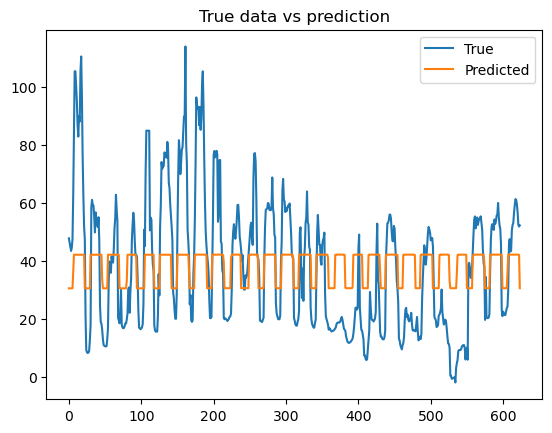

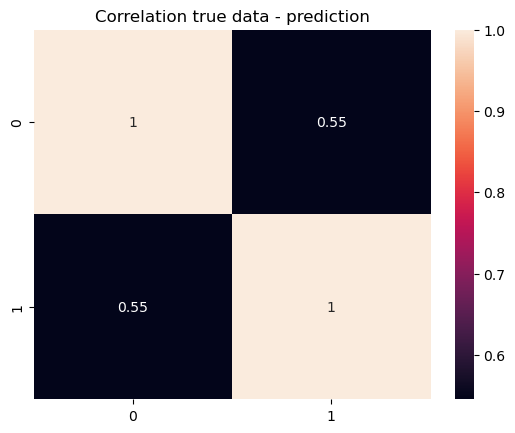

	r^2=0.202312
Mean Absolute Error (MAE): 16.78817244571623
Mean Squared Error (MSE): 424.403560311406
Root Mean Squared Error (RMSE): 20.601057261980657
Mean Absolute Percentage Error (MAPE): 168.02
Accuracy: -68.02
Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00


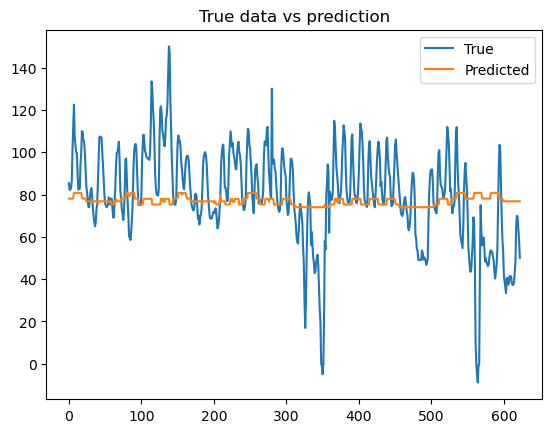

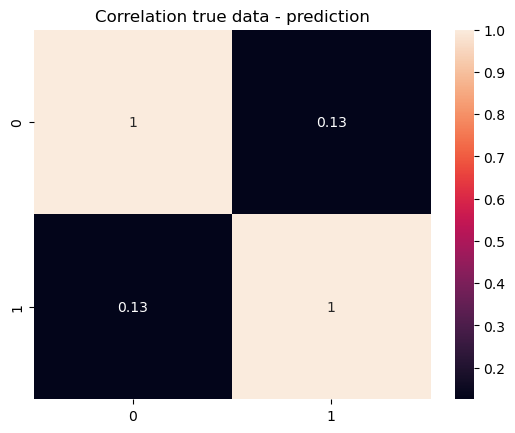

	r^2=0.000144
Mean Absolute Error (MAE): 16.93197635633668
Mean Squared Error (MSE): 511.7384274829417
Root Mean Squared Error (RMSE): 22.62163626891171
Mean Absolute Percentage Error (MAPE): 1689.82
Accuracy: -1589.82
Iteration  2
train 2018-01-09 00:00:00 - 2023-03-16 23:00:00, test 2023-03-17 00:00:00 - 2023-04-15 23:00:00


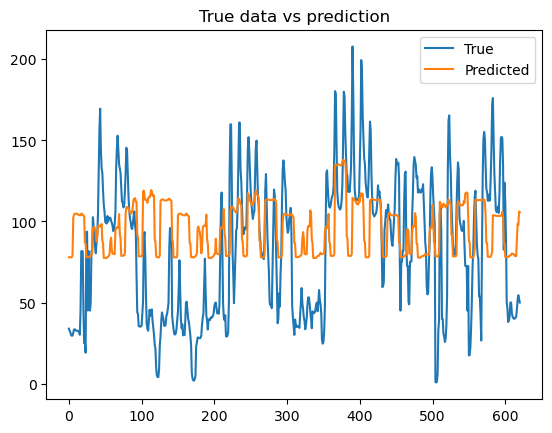

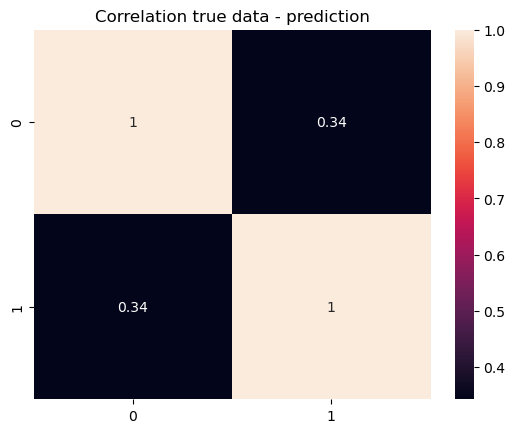

	r^2=0.027069
Mean Absolute Error (MAE): 35.15424702010664
Mean Squared Error (MSE): 1741.517642928767
Root Mean Squared Error (RMSE): 41.731494616521545
Mean Absolute Percentage Error (MAPE): 144.0
Accuracy: -44.0


In [31]:
rf_pred_0, rf_models_0 = run_model('rf', df_lagged, k_folds, split_method, train_start, features, target, cols_std)

### XGBoost

In [22]:
xgb_pred_0, xgb_models_0 = run_model('xgb', df_lagged, k_folds, split_method, train_start, features, target, cols_std,'long term')

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


ValueError: feature_names must be string, and may not contain [, ] or <

## Split - Method = 1
The approach is to split the data in increasing blocks. The size of the train set increases, whereas the size of the test remains 3 months.

In [16]:
split_method = 1

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


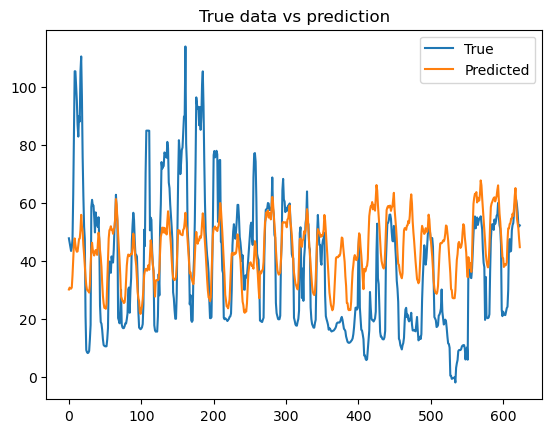

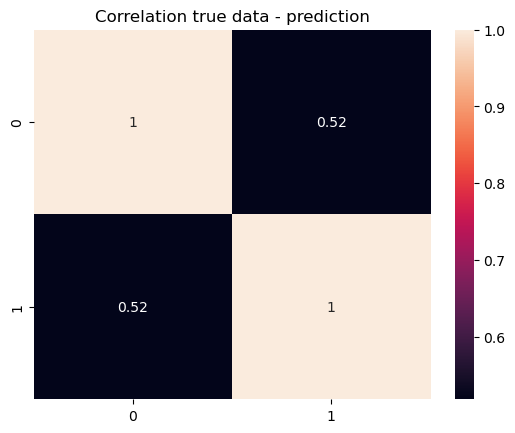

	r^2=0.205084
Mean Absolute Error (MAE): 16.52241190844902
Mean Squared Error (MSE): 422.9290097332413
Root Mean Squared Error (RMSE): 20.565237896344435
Mean Absolute Percentage Error (MAPE): 169.14
Accuracy: -69.14
Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00


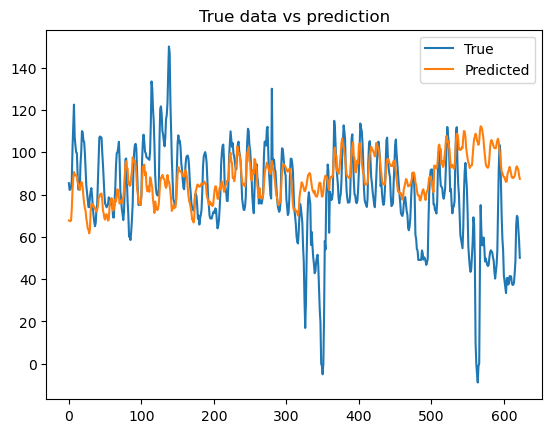

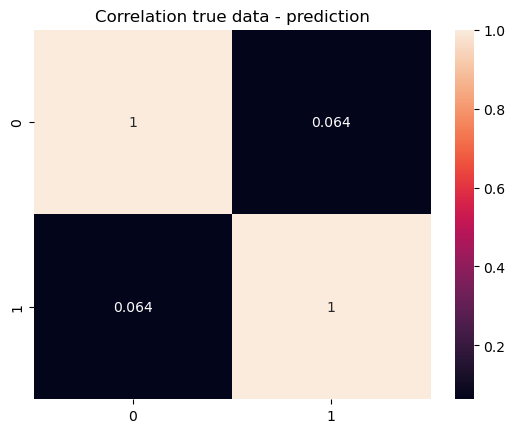

	r^2=-0.258808
Mean Absolute Error (MAE): 17.860673859093794
Mean Squared Error (MSE): 644.2733288432345
Root Mean Squared Error (RMSE): 25.38253984224657
Mean Absolute Percentage Error (MAPE): 1938.08
Accuracy: -1838.08
Iteration  2
train 2018-01-09 00:00:00 - 2023-03-16 23:00:00, test 2023-03-17 00:00:00 - 2023-04-15 23:00:00


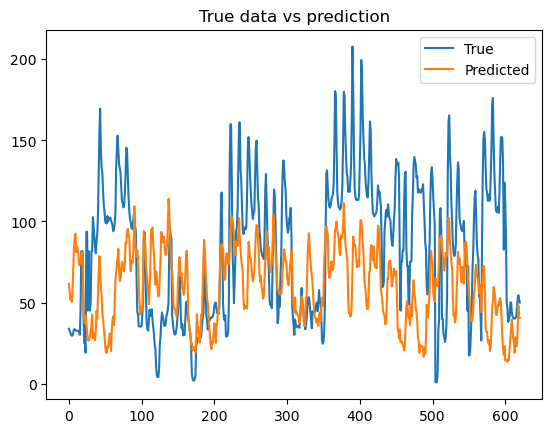

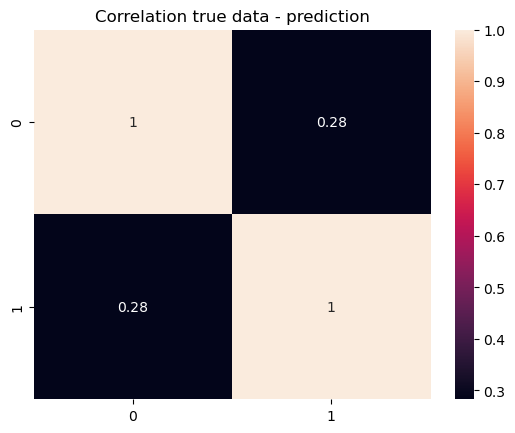

	r^2=-0.269821
Mean Absolute Error (MAE): 39.17621534275632
Mean Squared Error (MSE): 2272.941235761344
Root Mean Squared Error (RMSE): 47.675373472699135
Mean Absolute Percentage Error (MAPE): 97.16
Accuracy: 2.84


In [13]:
lr_pred_1, lr_model_1 = run_model('lr', df_lagged, k_folds, split_method,
                                         train_start, features, target, cols_std)

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


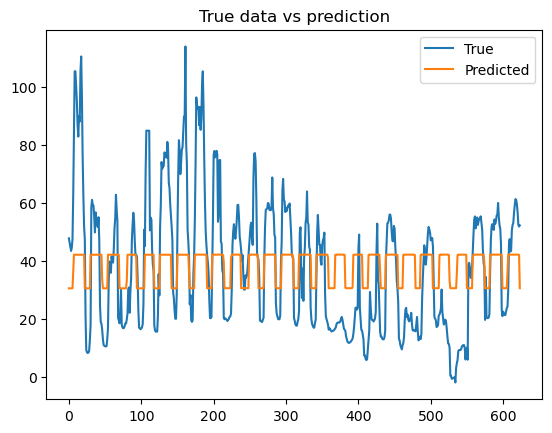

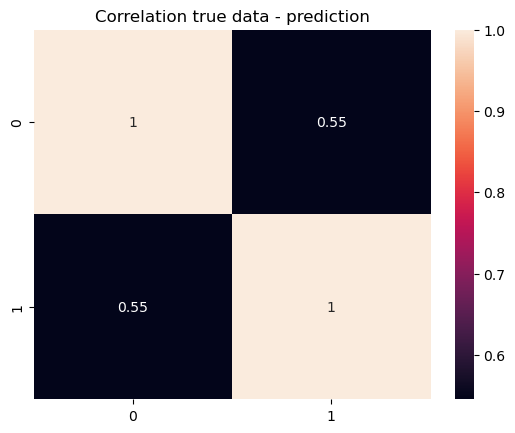

	r^2=0.202312
Mean Absolute Error (MAE): 16.78817244571623
Mean Squared Error (MSE): 424.403560311406
Root Mean Squared Error (RMSE): 20.601057261980657
Mean Absolute Percentage Error (MAPE): 168.02
Accuracy: -68.02
Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00


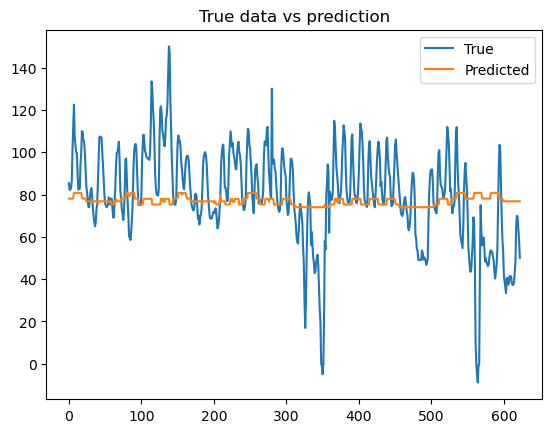

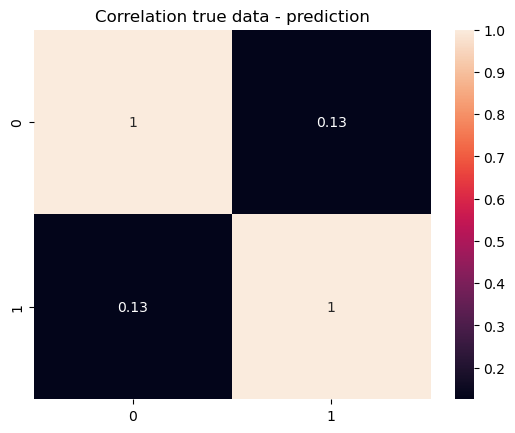

	r^2=0.000144
Mean Absolute Error (MAE): 16.93197635633668
Mean Squared Error (MSE): 511.7384274829417
Root Mean Squared Error (RMSE): 22.62163626891171
Mean Absolute Percentage Error (MAPE): 1689.82
Accuracy: -1589.82
Iteration  2
train 2018-01-09 00:00:00 - 2023-03-16 23:00:00, test 2023-03-17 00:00:00 - 2023-04-15 23:00:00


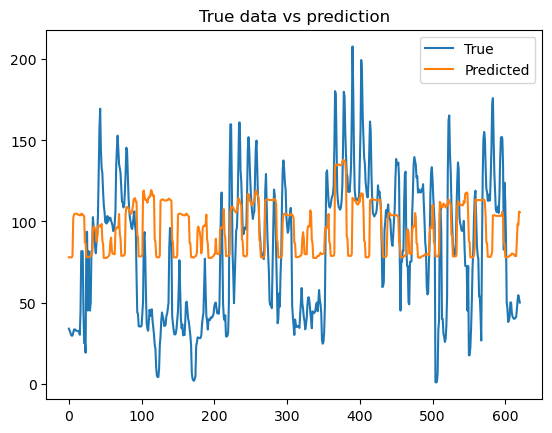

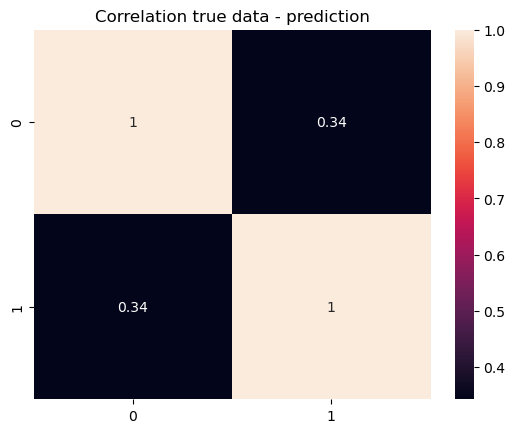

	r^2=0.027060
Mean Absolute Error (MAE): 35.154494180879226
Mean Squared Error (MSE): 1741.5338329254685
Root Mean Squared Error (RMSE): 41.73168859422619
Mean Absolute Percentage Error (MAPE): 144.0
Accuracy: -44.0


In [24]:
rf_pred_1, rf_models_1 = run_model('rf', df_lagged, k_folds, split_method, train_start, features, target, cols_std,X_std=False)

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


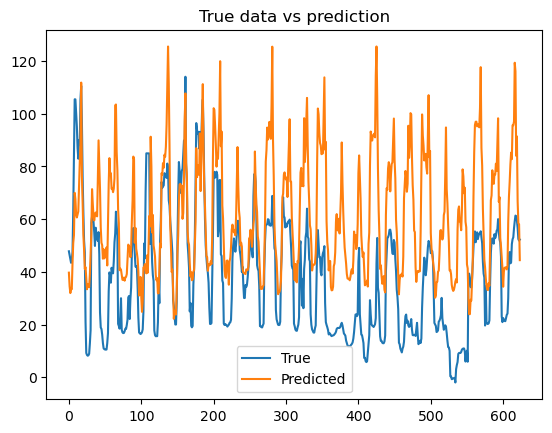

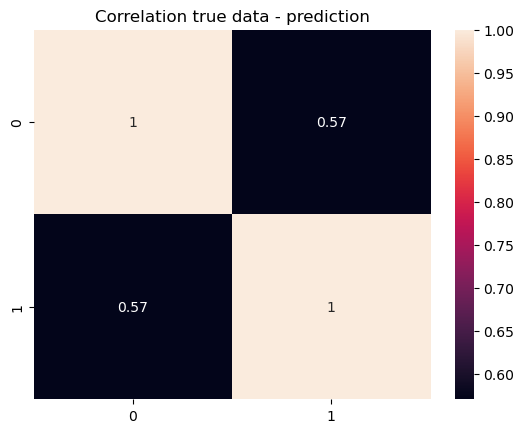

	r^2=-0.779168
Mean Absolute Error (MAE): 25.72464485474122
Mean Squared Error (MSE): 946.5924359395527
Root Mean Squared Error (RMSE): 30.76674236801083
Mean Absolute Percentage Error (MAPE): 229.99
Accuracy: -129.99
Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00


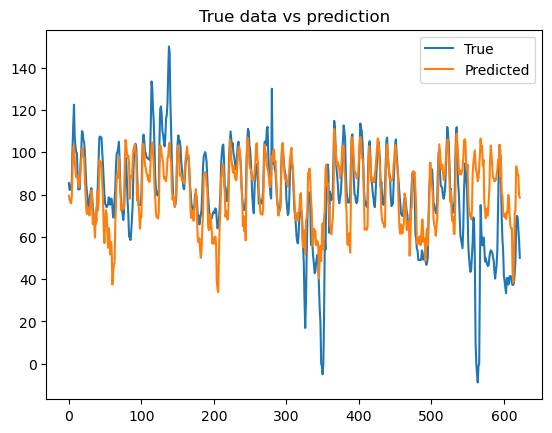

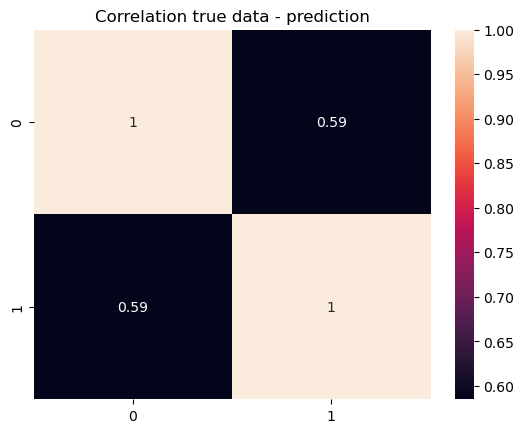

	r^2=0.323039
Mean Absolute Error (MAE): 12.927689907998564
Mean Squared Error (MSE): 346.4770121309075
Root Mean Squared Error (RMSE): 18.613892986984414
Mean Absolute Percentage Error (MAPE): 1369.58
Accuracy: -1269.58
Iteration  2
train 2018-01-09 00:00:00 - 2023-03-16 23:00:00, test 2023-03-17 00:00:00 - 2023-04-15 23:00:00


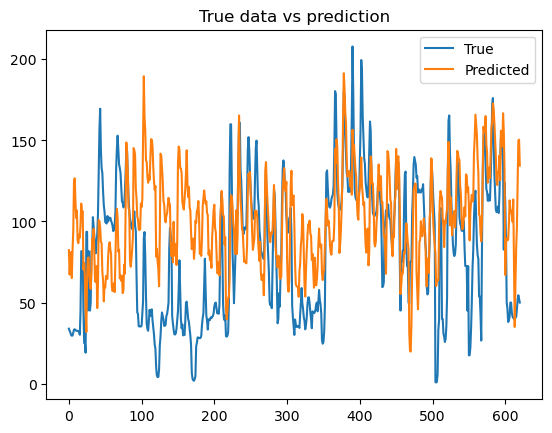

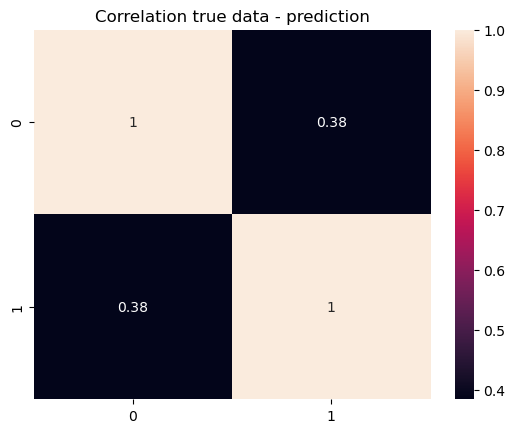

	r^2=-0.119382
Mean Absolute Error (MAE): 36.39553975607462
Mean Squared Error (MSE): 2003.6598993340392
Root Mean Squared Error (RMSE): 44.762259765722725
Mean Absolute Percentage Error (MAPE): 143.45
Accuracy: -43.45


In [29]:
xgb_pred_1, xgb_models_1 = run_model('xgb', df_lagged, k_folds, split_method, train_start, features, target, cols_std,X_std=False)

#### NOTES FRANCISCO/FREDERIK 14/04<br>
correlation between ytrue and ypred, RMSE can be hard to refrence.<br>
use power transform instead of log (how?)

# Long term

In [5]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.linear_model import Ridge


r=df.copy()
r = r.set_index('Timestamp')

def build_far(x_train, y_train, x_test,steps): # same split as short term
    model_ = ForecasterAutoreg(regressor = Ridge(),lags = 336)
    model_.fit(y=y_train,exog=x_train)
    ypred = model_.predict(steps = steps,exog = x_test)
# Add datetime index to predictions
    #ypred = pd.Series(data=ypred, index=x_test.index)
    return ypred, model_